## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(combined_study_df["Mouse ID"].value_counts())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = combined_study_df[combined_study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_study_df.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_row = combined_study_df.drop_duplicates(keep="first")
duplicate_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(duplicate_row)

1892

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Data = combined_study_df[["Drug Regimen", "Tumor Volume (mm3)"]]
Group_By_Data = Summary_Data.groupby(["Drug Regimen"])
Group_By_Data.head()
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_DF = pd.DataFrame({
    "Mean": Group_By_Data["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": Group_By_Data["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": Group_By_Data["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": Group_By_Data["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": Group_By_Data["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})
summary_DF.head()



,Mean,Median,Variance,Standard Variance,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
Agg_Data = duplicate_row.groupby('Drug Regimen').agg(
    Tumor_Volume_Mean = ('Tumor Volume (mm3)',np.mean),
    Tumor_Volume_Median = ('Tumor Volume (mm3)',np.median),
    Tumor_Volume_Var =('Tumor Volume (mm3)',np.var),
    Tumor_Vol_Stdev = ('Tumor Volume (mm3)', np.std),
    Tumor_Vol_SEM = ('Tumor Volume (mm3)', st.sem)
).round(2)

Agg_Data.head()


,Tumor_Volume_Mean,Tumor_Volume_Median,Tumor_Volume_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


## Bar and Pie Charts

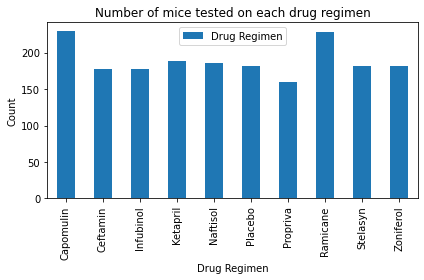

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Create a dataframe group by the 'Drug Regimen' column
Group_Data = duplicate_row.groupby("Drug Regimen")

# Find the total number of data points for each 'Drug Regimen'
mice_num_count =pd.DataFrame(Group_Data["Drug Regimen"].count()) 

# Create a bar chart visualizing the total number of mice tested on each drug regimen
chart = mice_num_count.plot(kind='bar', title ="Number of mice tested on each drug regimen")

# set the xlabel and ylabel
chart.set_xlabel("Drug Regimen")
chart.set_ylabel("Count")
plt.tight_layout()

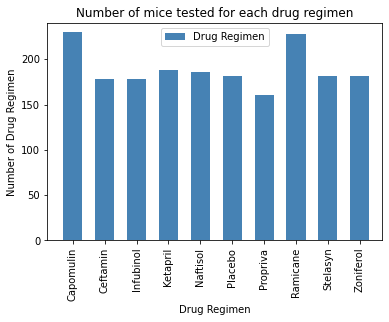

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Use the same groupby data frame created above
# set x_axis and tick locations
x_axis = np.arange(len(mice_num_count))
tick_locations = [value for value in x_axis]
tick_locations

# create a bar chart and a list indicating where to write x labels
plt.bar(x_axis, mice_num_count["Drug Regimen"], color ="steelblue", align = "center", width = 0.6)
plt.xticks(tick_locations, mice_num_count.index, rotation = "vertical" )

# Set x and y limits
plt.xlim(-0.8, len(x_axis)-0.3)
plt.ylim(0, 240)

# Set titles and xlabel and ylabel
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Drug Regimen")
plt.title("Number of mice tested for each drug regimen")

# add a legend
legend_name = ["Drug Regimen"]
plt.legend(legend_name,loc="best")

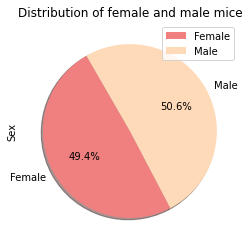

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = duplicate_row.groupby("Sex")
gender_dtb = pd.DataFrame(gender_group["Sex"].count())
#gender_dtb

colors =["lightcoral", "peachpuff"]
gender_chart = gender_dtb.plot(kind ="pie",y="Sex", colors =colors , startangle=120,
                               title= "Distribution of female and male mice",
                              autopct = "%1.1f%%", shadow=True)

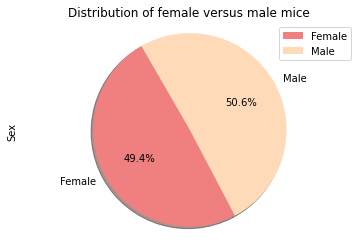

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_dtb["Sex"], labels = ["Female","Male"], colors = colors, autopct = "%1.1f%%",
       shadow=True, startangle=120)
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")

legend_name = ["Female", "Male"]
plt.legend(legend_name, loc ="best")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
duplicate_row.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Sorted_df = duplicate_row.sort_values(["Drug Regimen","Mouse ID", "Timepoint"], ascending = True)
Last_row_df = Sorted_df.loc[Sorted_df["Timepoint"] == 45]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_drugs_df = Last_row_df[Last_row_df["Drug Regimen"].isin(four_drug_list)]
four_drugs_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...
420,q597,Ramicane,Male,20,25,45,45.220869,2
234,r811,Ramicane,Male,9,19,45,37.225650,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
410,u196,Ramicane,Male,18,25,45,40.667713,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin_df = four_drugs_df[four_drugs_df["Drug Regimen"] == "Capomulin"]
Capomulin_list = Capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Capomulin_list = Capomulin_list["Tumor Volume (mm3)"]

Ceftamin_df = four_drugs_df[four_drugs_df["Drug Regimen"] == "Ceftamin"]
Ceftamin_list = Ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending =True).reset_index()
Ceftamin_list = Ceftamin_list["Tumor Volume (mm3)"]

Infubinol_df = four_drugs_df[four_drugs_df["Drug Regimen"] == "Infubinol"]
Infubinol_list = Infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Infubinol_list = Infubinol_list["Tumor Volume (mm3)"]

Ramicane_df = four_drugs_df[four_drugs_df["Drug Regimen"] == "Ramicane"]
Ramicane_list = Ramicane_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Ramicane_list = Ramicane_list["Tumor Volume (mm3)"]

# Create drug dictionary for plotting
drug_dict = {"Capomulin":Capomulin_list, "Ceftamin":Ceftamin_list, 
             "Infubinol":Infubinol_list, "Ramicane":Ramicane_list}
    

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# IQR and quartile information for Capomulin
quartiles = Capomulin_list.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = (upperq - lowerq).round(2)

print(f"Capomulin quartile information:")
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"-------------------------------------------------------")

# IQR and quartile information for Ceftamin
quartiles = Ceftamin_list.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = (upperq - lowerq).round(2)

print(f"Ceftamin quartile information:")
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"-------------------------------------------------------")

# IQR and quartile information for Infubinol
quartiles = Infubinol_list.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = (upperq - lowerq).round(2)

print(f"Infubinol quartile information:")
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"-------------------------------------------------------")

# IQR and quartile information for Ramicane
quartiles = Ramicane_list.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = (upperq - lowerq).round(2)

print(f"Ramicane quartile information:")
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = (lowerq - (1.5*iqr)).round(2)
upper_bound = (upperq + (1.5*iqr)).round(2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"-------------------------------------------------------")

Capomulin quartile information:
The lower quartile of Tumor Volume (mm3) is: 32.38
The upper quartile of Tumor Volume (mm3) is: 40.16
The interquartile range of Tumor Volume (mm3) is: 7.78
The the median of Tumor Volume (mm3) is: 37.31 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
-------------------------------------------------------
Ceftamin quartile information:
The lower quartile of Tumor Volume (mm3) is: 61.43
The upper quartile of Tumor Volume (mm3) is: 67.53
The interquartile range of Tumor Volume (mm3) is: 6.1
The the median of Tumor Volume (mm3) is: 64.3 
Values below 52.28 could be outliers.
Values above 76.68 could be outliers.
-------------------------------------------------------
Infubinol quartile information:
The lower quartile of Tumor Volume (mm3) is: 62.75
The upper quartile of Tumor Volume (mm3) is: 67.69
The interquartile range of Tumor Volume (mm3) is: 4.94
The the median of Tumor Volume (mm3) is: 66.08 
Values below 55.34 could be 

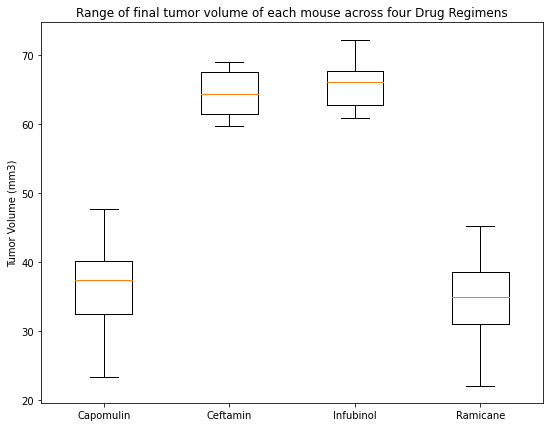

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize=(9,7))
ax.boxplot(drug_dict.values())
ax.set_xticklabels(drug_dict.keys())
ax.set_title('Range of final tumor volume of each mouse across four Drug Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [19]:
duplicate_row.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


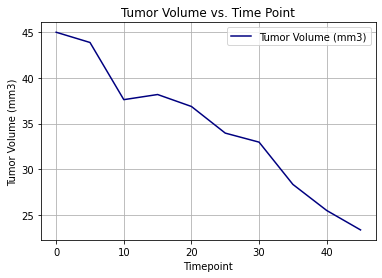

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
new_df=duplicate_row[(duplicate_row["Drug Regimen"] == "Capomulin") & (duplicate_row["Mouse ID"]== "s185")]

time_point = new_df["Timepoint"]
tumor_vol = new_df["Tumor Volume (mm3)"].tolist()
plt.figure()
tumor_line, = plt.plot(time_point, tumor_vol,color = "navy", label = "Tumor Volume (mm3)")
plt.legend(handles=[tumor_line], loc="best")
plt.title("Tumor Volume vs. Time Point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()


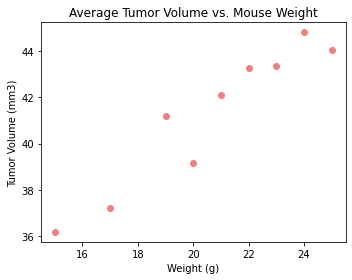

In [99]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = duplicate_row[duplicate_row["Drug Regimen"]== "Capomulin"]
tumor_weight_vol = Capomulin_df.groupby(['Weight (g)']).agg(
    Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean)).round(2)

weight_value = tumor_weight_vol.index.values
plt.figure(figsize=(5,4))
plt.scatter(weight_value,tumor_weight_vol["Tumor_Vol_Mean"],marker = "o",
            color= "lightcoral", alpha=1 )
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between both factors is 0.95
The r-squared is: 0.9504680952399136
The equation of the regression line is: y = 0.9x + 22.75


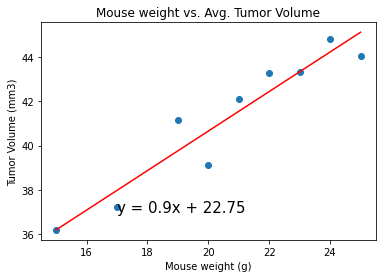

In [107]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight_value, tumor_weight_vol["Tumor_Vol_Mean"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_value = weight_value
y_value = tumor_weight_vol["Tumor_Vol_Mean"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()